<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

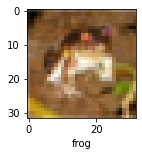

In [10]:
plot_sample(X_train, y_train, 0)

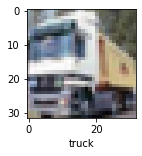

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])



In [14]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3000)              9219000   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3001000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


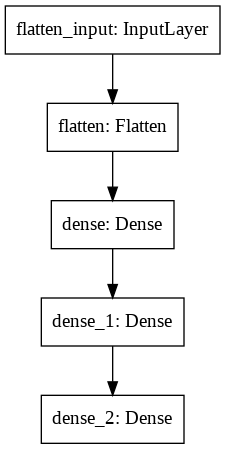

In [16]:
import pydot
from tensorflow import keras
keras.utils.plot_model(ann)

In [17]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:


ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.8114 - accuracy: 0.3562
Epoch 2/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.6215 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 96s 62ms/step - loss: 1.5395 - accuracy: 0.4553
Epoch 4/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4806 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 96s 62ms/step - loss: 1.4317 - accuracy: 0.4949


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.35      0.47      1000
           1       0.70      0.48      0.57      1000
           2       0.40      0.20      0.27      1000
           3       0.27      0.55      0.36      1000
           4       0.41      0.49      0.44      1000
           5       0.48      0.27      0.34      1000
           6       0.45      0.62      0.52      1000
           7       0.50      0.57      0.53      1000
           8       0.63      0.60      0.61      1000
           9       0.55      0.59      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [23]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

Number of parameters in a CONV layer would be : 

((m * n * d)+1)* k), added 1 because of the bias term for each filter. The same expression can be written as follows: 

((shape of width of the filter (m) * shape of height of the filter (n)* number of filters in the previous layer (d)+1)*number of filters (k)).

 Where the term “filter” refer to the number of filters in the current layer.


First Conv2D Layer= ((3x3x3) +1) x 32 = 896

---




Second Conv2D Layer = ((3x3x32)+1) x 64= 18496


Dense_3= (2304x64)+64= 147520


Dense_4=(64x10)+10=650







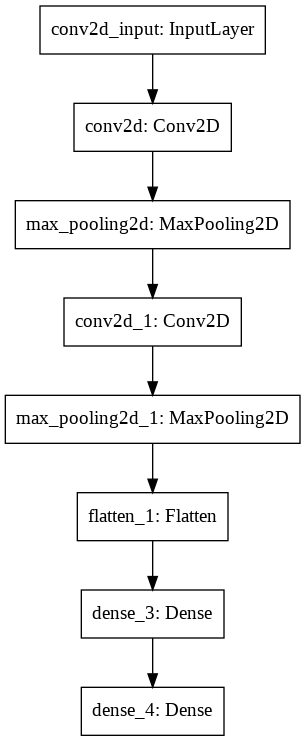

In [24]:
import pydot
from tensorflow import keras
keras.utils.plot_model(cnn)

In [25]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4427 - accuracy: 0.4818
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0960 - accuracy: 0.6145
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9648 - accuracy: 0.6625
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8752 - accuracy: 0.6960
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7999 - accuracy: 0.7228
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7385 - accuracy: 0.7432
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6825 - accuracy: 0.7634
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6280 - accuracy: 0.7810
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.5853 - accuracy: 0.7957
Epoch 10/10
1563/1563 [==============================] - 59s 38m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [27]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9506 - accuracy: 0.7019


[0.9505505561828613, 0.7019000053405762]

In [28]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.7746466e-03, 3.7375203e-04, 4.5428060e-02, 8.1822598e-01,
        2.8198713e-03, 7.8246944e-02, 3.6360871e-02, 5.6218926e-04,
        1.3739554e-02, 2.4681401e-03],
       [2.5622178e-06, 7.4722972e-03, 7.3144080e-10, 6.5927969e-10,
        4.8379789e-10, 6.6026056e-12, 1.3024664e-11, 7.2739982e-12,
        9.9252290e-01, 2.1994811e-06],
       [2.0059118e-02, 1.4310659e-01, 7.2252566e-05, 2.5324282e-04,
        3.5401501e-04, 5.0063834e-05, 5.9991949e-06, 1.4185057e-04,
        8.3485782e-01, 1.0990133e-03],
       [8.1249398e-01, 2.7068323e-03, 4.7866493e-03, 9.5919095e-04,
        3.2600766e-04, 1.6551495e-06, 6.1299198e-07, 2.5961881e-05,
        1.7861857e-01, 8.0570600e-05],
       [2.1889080e-06, 1.2422830e-06, 8.3246233e-04, 8.4025934e-03,
        2.4391282e-01, 4.9429214e-05, 7.4605864e-01, 7.4150499e-08,
        7.3949178e-04, 1.0506703e-06]], dtype=float32)

In [29]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [30]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

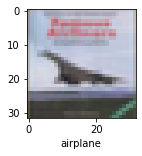

In [31]:
plot_sample(X_test, y_test,3)

In [32]:
classes[y_classes[3]]

'airplane'

In [33]:
classes[y_classes[3]]

'airplane'